<a href="https://colab.research.google.com/github/chaos1231107/2023_2nd_simester/blob/kinematics/%EC%8B%A4%EC%8A%B51%EA%B0%95_%EB%8F%99%EC%97%AD%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
# import warnings
# warnings.filterwarnings("ignore")


In [2]:
t = np.linspace(0,6,100)
print(t)

[0.         0.06060606 0.12121212 0.18181818 0.24242424 0.3030303
 0.36363636 0.42424242 0.48484848 0.54545455 0.60606061 0.66666667
 0.72727273 0.78787879 0.84848485 0.90909091 0.96969697 1.03030303
 1.09090909 1.15151515 1.21212121 1.27272727 1.33333333 1.39393939
 1.45454545 1.51515152 1.57575758 1.63636364 1.6969697  1.75757576
 1.81818182 1.87878788 1.93939394 2.         2.06060606 2.12121212
 2.18181818 2.24242424 2.3030303  2.36363636 2.42424242 2.48484848
 2.54545455 2.60606061 2.66666667 2.72727273 2.78787879 2.84848485
 2.90909091 2.96969697 3.03030303 3.09090909 3.15151515 3.21212121
 3.27272727 3.33333333 3.39393939 3.45454545 3.51515152 3.57575758
 3.63636364 3.6969697  3.75757576 3.81818182 3.87878788 3.93939394
 4.         4.06060606 4.12121212 4.18181818 4.24242424 4.3030303
 4.36363636 4.42424242 4.48484848 4.54545455 4.60606061 4.66666667
 4.72727273 4.78787879 4.84848485 4.90909091 4.96969697 5.03030303
 5.09090909 5.15151515 5.21212121 5.27272727 5.33333333 5.393939

In [3]:
def position(t):
    return 6*np.square(t) - np.power(t,3)

In [4]:
x = position(t)

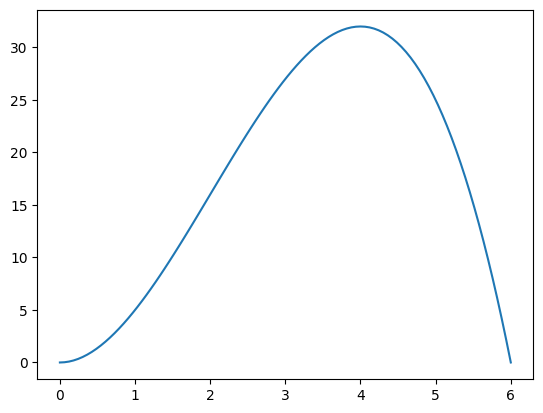

In [5]:
plt.plot(t,x)
plt.show()

In [6]:
def velocity(t):
    return 12*t - np.square(t)

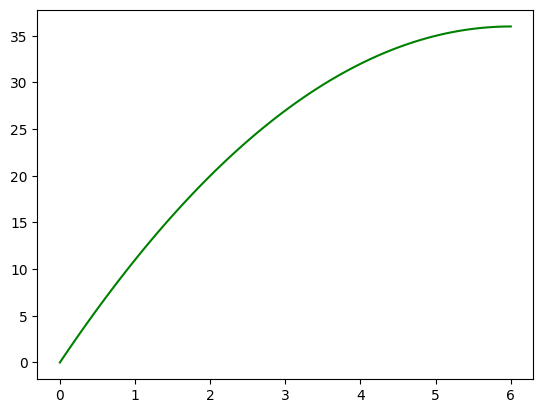

In [7]:
plt.plot(t, velocity(t),'g')
plt.show()

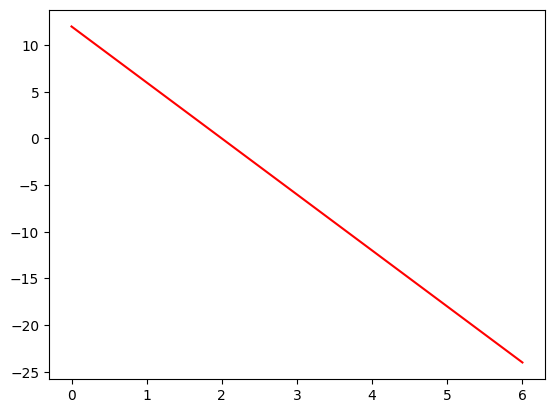

In [8]:
def accel(t):
    return 12-6*t
plt.plot(t, accel(t),'r')
plt.show()

In [9]:
t = symbols('t')
t

t

In [10]:
position = 6*t**2 - sp.Pow(t, 3)

In [11]:
position

-t**3 + 6*t**2

In [12]:
t_val = np.linspace(0, 6, 100)

In [13]:
p_val = position.subs(t,1)

In [14]:
print(p_val)

5


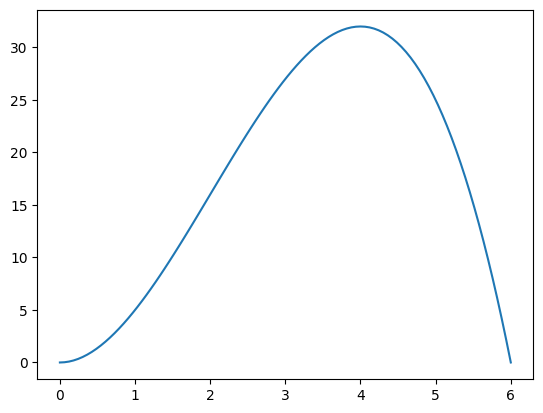

In [15]:
p_val = []
#subs : means particular value at t = k (with constant k)
for t_unit in t_val:
    p_val.append(position.subs(t,t_unit))
plt.plot(t_val, p_val)
plt.show()

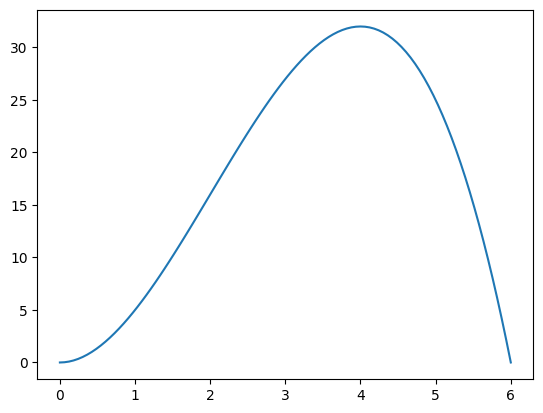

In [16]:
p_val = np.array([position.subs(t,t_unit) for t_unit in t_val])
plt.plot(t_val, p_val)
plt.show()

In [17]:
velocity = sp.diff(position,t)
velocity

-3*t**2 + 12*t

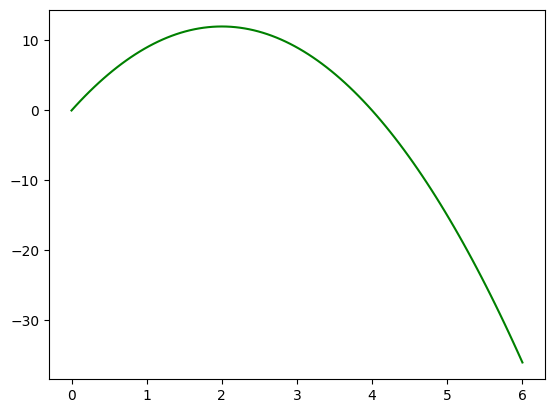

In [18]:
v_val = np.array([velocity.subs(t,t_units) for t_units in t_val])
plt.plot(t_val, v_val,'g')
plt.show()

In [19]:
accel = sp.diff(velocity, t)
accel

12 - 6*t

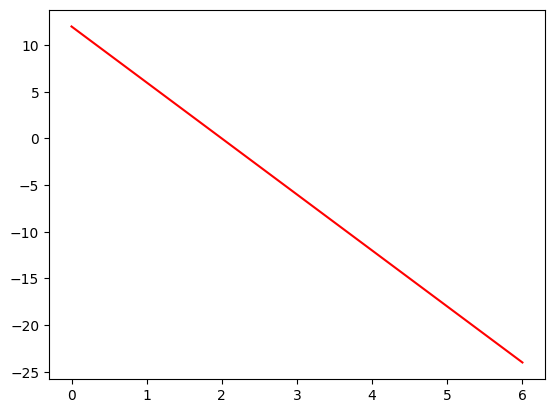

In [20]:
a_val = np.array([accel.subs(t,t_unit) for t_unit in t_val])
plt.plot(t_val, a_val,'r')
plt.show()

In [21]:
sp.integrate(accel,t)

-3*t**2 + 12*t

In [22]:
velocity

-3*t**2 + 12*t

In [23]:
sp.integrate(velocity, t)

-t**3 + 6*t**2

In [24]:
position

-t**3 + 6*t**2

###TensorFlow

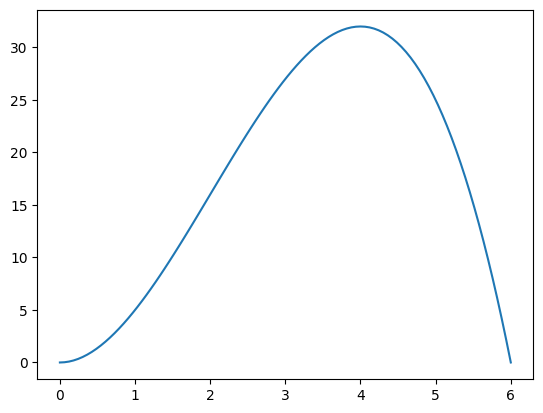

In [25]:
def position(t):
    return -tf.math.pow(t, 3) + 6*tf.math.square(t)
plt.plot(t_val, position(t_val))
plt.show()

In [26]:
with tf.GradientTape() as tape:
    t_tf = tf.constant(t_val)
    tape.watch(t_tf)
    p_val = position(t_tf)
v_val = tape.gradient(p_val, t_tf)

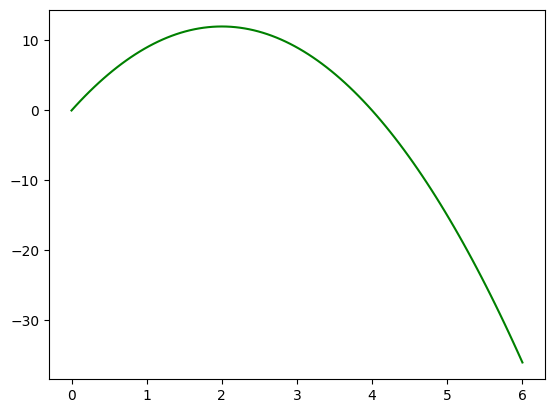

In [27]:
plt.plot(t_val, v_val, 'g')
plt.show()

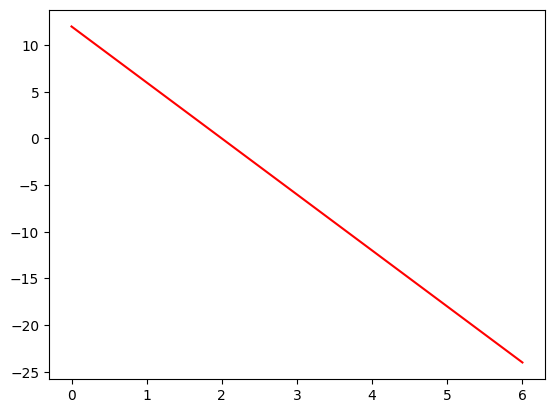

In [28]:
with tf.GradientTape(persistent=True) as tape:
    t_tf = tf.constant(t_val)
    tape.watch(t_tf)
    p_val = position(t_tf)
    v_val = tape.gradient(p_val,t_tf)
a_val = tape.gradient(v_val,t_tf)
plt.plot(t_val, a_val,'r')
plt.show()

###Diffrences : automatic differentiation but for discrete numeric points (backpropagation)

In [29]:
with tf.GradientTape(persistent=True) as tape:
    t_tf = tf.constant(t_val)
    tape.watch(t_tf)
    p_val = position(t_tf)
    v_val = tape.gradient(p_val, t_tf)
a_val = tape.gradient(v_val, t_tf)

In [30]:
t_val

array([0.        , 0.06060606, 0.12121212, 0.18181818, 0.24242424,
       0.3030303 , 0.36363636, 0.42424242, 0.48484848, 0.54545455,
       0.60606061, 0.66666667, 0.72727273, 0.78787879, 0.84848485,
       0.90909091, 0.96969697, 1.03030303, 1.09090909, 1.15151515,
       1.21212121, 1.27272727, 1.33333333, 1.39393939, 1.45454545,
       1.51515152, 1.57575758, 1.63636364, 1.6969697 , 1.75757576,
       1.81818182, 1.87878788, 1.93939394, 2.        , 2.06060606,
       2.12121212, 2.18181818, 2.24242424, 2.3030303 , 2.36363636,
       2.42424242, 2.48484848, 2.54545455, 2.60606061, 2.66666667,
       2.72727273, 2.78787879, 2.84848485, 2.90909091, 2.96969697,
       3.03030303, 3.09090909, 3.15151515, 3.21212121, 3.27272727,
       3.33333333, 3.39393939, 3.45454545, 3.51515152, 3.57575758,
       3.63636364, 3.6969697 , 3.75757576, 3.81818182, 3.87878788,
       3.93939394, 4.        , 4.06060606, 4.12121212, 4.18181818,
       4.24242424, 4.3030303 , 4.36363636, 4.42424242, 4.48484

In [31]:
v_val

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([  0.        ,   0.71625344,   1.41046832,   2.08264463,
         2.73278237,   3.36088154,   3.96694215,   4.55096419,
         5.11294766,   5.65289256,   6.1707989 ,   6.66666667,
         7.14049587,   7.5922865 ,   8.02203857,   8.42975207,
         8.815427  ,   9.17906336,   9.52066116,   9.84022039,
        10.13774105,  10.41322314,  10.66666667,  10.89807163,
        11.10743802,  11.29476584,  11.4600551 ,  11.60330579,
        11.72451791,  11.82369146,  11.90082645,  11.95592287,
        11.98898072,  12.        ,  11.98898072,  11.95592287,
        11.90082645,  11.82369146,  11.72451791,  11.60330579,
        11.4600551 ,  11.29476584,  11.10743802,  10.89807163,
        10.66666667,  10.41322314,  10.13774105,   9.84022039,
         9.52066116,   9.17906336,   8.815427  ,   8.42975207,
         8.02203857,   7.5922865 ,   7.14049587,   6.66666667,
         6.1707989 ,   5.65289256,   5.11294766,   4.55096419,
       

###practice 1

In [37]:
t = symbols('t')
t_val = np.linspace(0, 6, 100)
position = sp.Pow(t,3) - 6*np.square(t) - 15*t + 40
position

t**3 - 6*t**2 - 15*t + 40

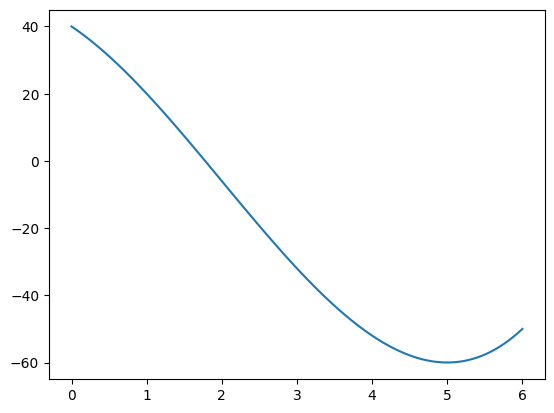

In [41]:
p_val = np.array([position.subs(t,t_unit) for t_unit in t_val])
plt.plot(t_val, p_val)
plt.show()

In [44]:
velocity = sp.diff(position)
velocity

3*t**2 - 12*t - 15

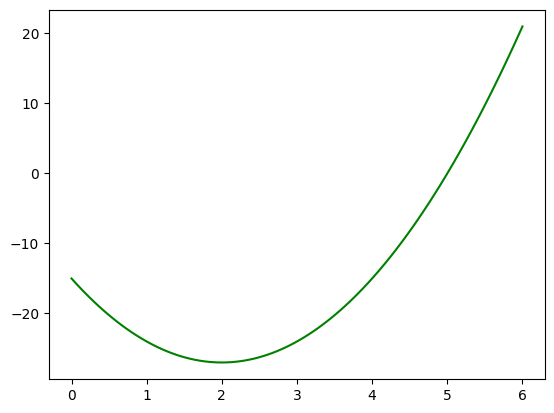

In [46]:
v_val = np.array([velocity.subs(t, t_unit) for t_unit in t_val])
plt.plot(t_val, v_val,'g')
plt.show()

In [49]:
accel = sp.diff(velocity)
accel

6*t - 12

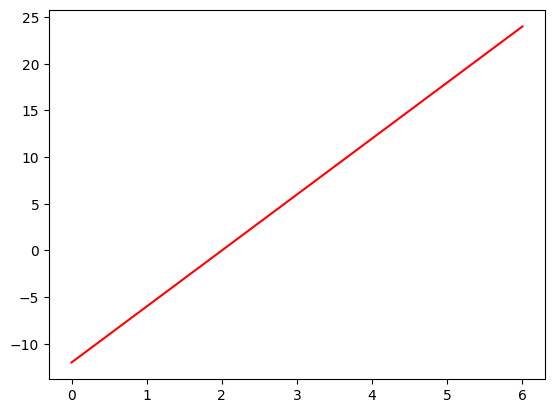

In [53]:
a_val = np.array([accel.subs(t, t_unit) for t_unit in t_val])
plt.plot(t_val, a_val, 'r')
plt.show()

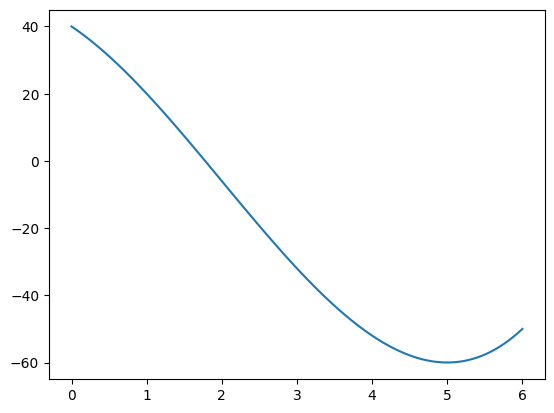

In [57]:
#tensorflow
def position(t):
    return tf.math.pow(t,3) - 6*tf.math.pow(t,2) -15*tf.math.pow(t,1) + 40
plt.plot(t_val, position(t_val))
plt.show()

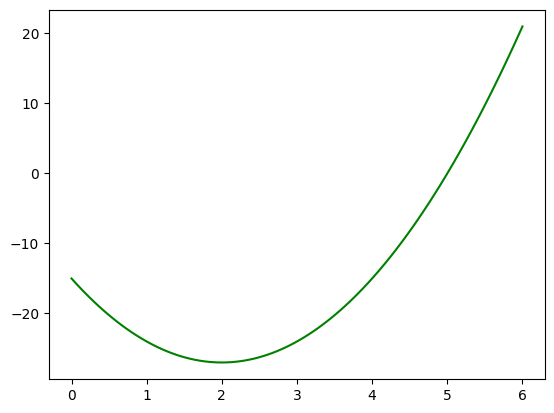

In [64]:
with tf.GradientTape(persistent=True) as tape:
    t_tf = tf.constant(t_val)
    tape.watch(t_tf)
    p_val = position(t_tf)
v_val = tape.gradient(p_val, t_tf)
plt.plot(t_val, v_val,'g')
plt.show()

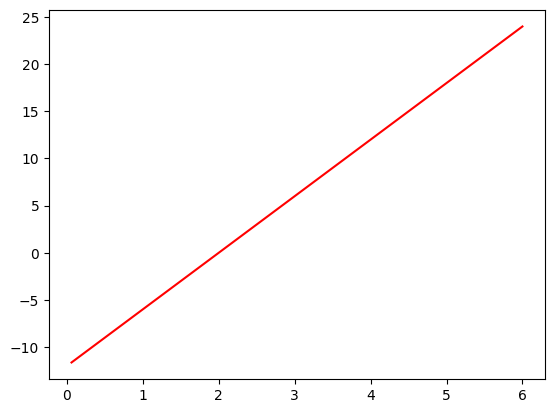

In [68]:
with tf.GradientTape(persistent=True) as tape:
    t_tf = tf.constant(t_val)
    tape.watch(t_tf)
    p_val = position(t_tf)
    v_val = tape.gradient(p_val, t_tf)
a_val = tape.gradient(v_val, t_tf)
plt.plot(t_val, a_val,'r')
plt.show()